# Electric Vehicle Dataset

TASKS:
Some basic tasks would include

1) Which car has the fastest 0-100 acceleration?

2) Which has the highest efficiency?

3) Does a difference in power train effect the range, top speed, efficiency?

4) Which manufacturer has the most number of vehicles?

5) How does price relate to rapid charging?

In [9]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# creating a DataFrame

ev = pd.read_csv('ElectricCarData_Clean.csv')
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [11]:
ev = ev.drop(labels = ['PlugType', 'Segment'], axis = 1)

In [12]:
ev

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Hatchback,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Liftback,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,SUV,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Hatchback,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Hatchback,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,SUV,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Hatchback,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Hatchback,5,65000


In [13]:
#Which car has the fastest 0-100 acceleration?

ev.nsmallest(1, 'AccelSec')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Cabrio,4,215000


In [14]:
#Which manufacturer has the most number of vehicles?

ev['Brand'].value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

In [17]:
#Which has the highest efficiency?

ev.nlargest(1,'Efficiency_WhKm')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
84,Mercedes,EQV 300 Long,10.0,140,330,273,290,Yes,FWD,SPV,7,70631


In [18]:
ev_new = ev[['PowerTrain', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']]

In [19]:
ev_new.head()

,PowerTrain,TopSpeed_KmH,Range_Km,Efficiency_WhKm
0,AWD,233,450,161
1,RWD,160,270,167
2,AWD,210,400,181
3,RWD,180,360,206
4,RWD,145,170,168


Text(0.5, 1.08, 'Relation between the Power Trains and Range, Top Speed and Efficiency')

<Figure size 2400x1000 with 0 Axes>

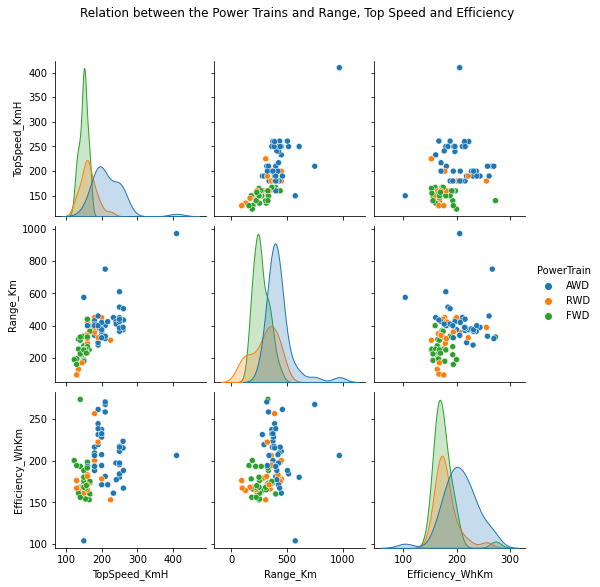

In [35]:
#Does a difference in power train effect the range, top speed, efficiency?

plt.figure(figsize = (12,5), dpi = 200)
g = sns.pairplot(ev_new, hue = 'PowerTrain')

g.fig.suptitle('Relation between the Power Trains and Range, Top Speed and Efficiency', y = 1.08)


In [23]:
ev[['RapidCharge', 'PriceEuro']].head()

,RapidCharge,PriceEuro
0,Yes,55480
1,Yes,30000
2,Yes,56440
3,Yes,68040
4,Yes,32997


Text(0.5, 1.03, 'Price relation to rapid charging')

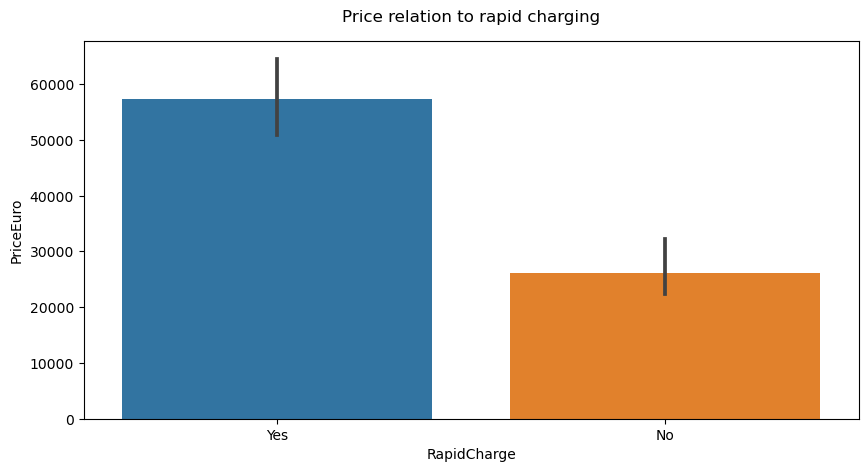

In [45]:
#How does price relate to rapid charging?

plt.figure(figsize = (10,5), dpi = 100)
sns.barplot(y = 'PriceEuro', x = 'RapidCharge', data = ev)
plt.title('Price relation to rapid charging', y = 1.03)


In [39]:
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Hatchback,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Liftback,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,SUV,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Hatchback,4,32997


In [40]:
ev['BodyStyle'].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

In [41]:
ev[['TopSpeed_KmH', 'BodyStyle']].head()

,TopSpeed_KmH,BodyStyle
0,233,Sedan
1,160,Hatchback
2,210,Liftback
3,180,SUV
4,145,Hatchback


Text(0.5, 1.0, 'Bodytype Vs Top Speed')

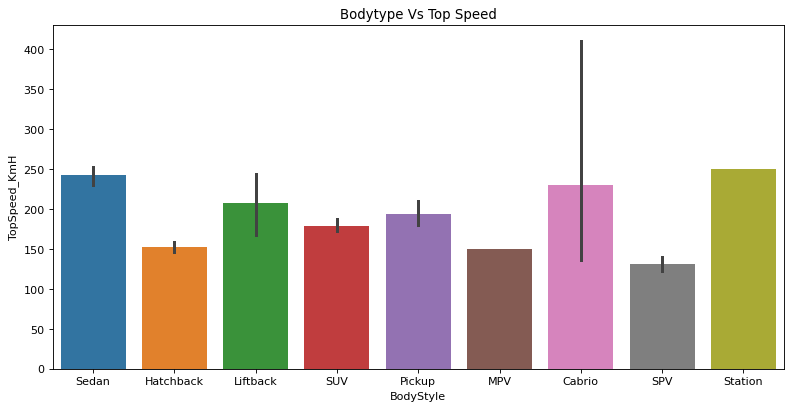

In [54]:
plt.figure(figsize = (10,5), dpi = 80)
sns.barplot(data = ev, x = 'BodyStyle', y = 'TopSpeed_KmH')
plt.tight_layout()
plt.title('Bodytype Vs Top Speed')

In [55]:
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Hatchback,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Liftback,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,SUV,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Hatchback,4,32997


In [56]:
ev[['Efficiency_WhKm', 'BodyStyle']].head()

,Efficiency_WhKm,BodyStyle
0,161,Sedan
1,167,Hatchback
2,181,Liftback
3,206,SUV
4,168,Hatchback


Text(0.5, 1.0, 'Bodytype Vs Efficiency')

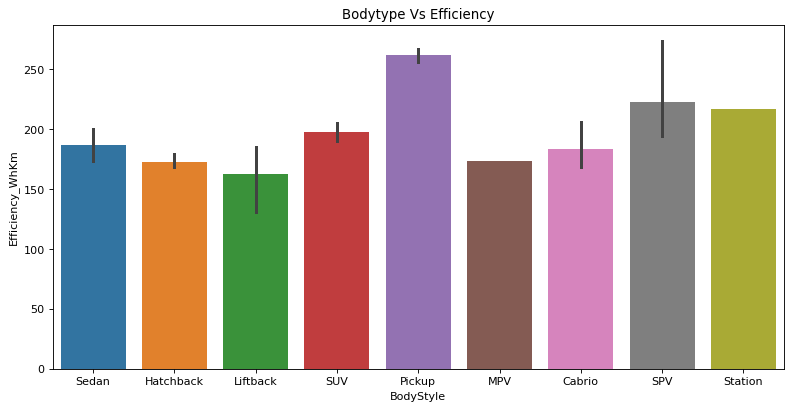

In [58]:
plt.figure(figsize = (10,5), dpi = 80)
sns.barplot(data = ev, x = 'BodyStyle', y = 'Efficiency_WhKm')
plt.tight_layout()
plt.title('Bodytype Vs Efficiency')

In [59]:
ev[['TopSpeed_KmH', 'Efficiency_WhKm']].head()

,TopSpeed_KmH,Efficiency_WhKm
0,233,161
1,160,167
2,210,181
3,180,206
4,145,168


Text(0.5, 1.0, 'Top Speed Vs Efficiency')

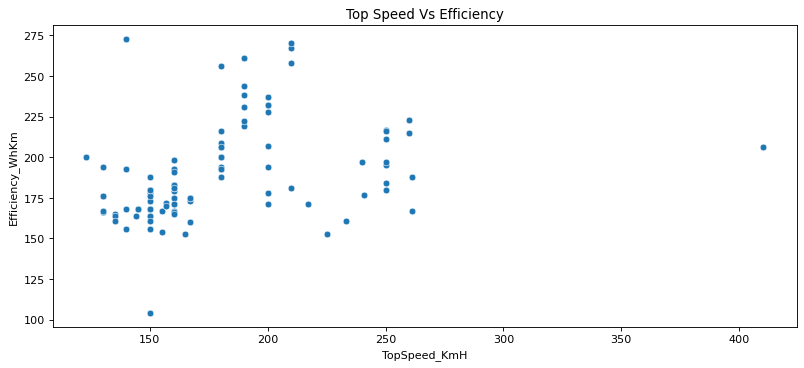

In [69]:
#To find relation between Top Speed and Efficiency

plt.figure(figsize = (12,5), dpi = 80)
sns.scatterplot(x = 'TopSpeed_KmH', y = 'Efficiency_WhKm', data = ev, palette = 'deep')
plt.title('Top Speed Vs Efficiency')

In [66]:
ev[['AccelSec', 'Efficiency_WhKm']].head()

,AccelSec,Efficiency_WhKm
0,4.6,161
1,10.0,167
2,4.7,181
3,6.8,206
4,9.5,168


Text(0.5, 1.0, 'Acceleration/s vs Efficiency')

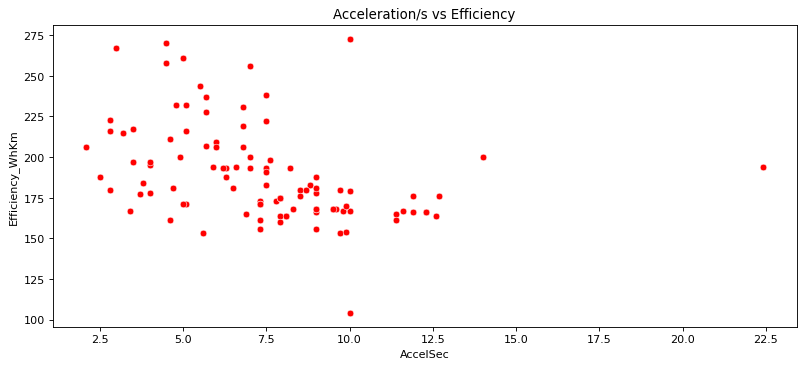

In [71]:
#To find a relation between Acceleration per sec to Efficiency

plt.figure(figsize = (12,5), dpi = 80)
sns.scatterplot(x = 'AccelSec', y = 'Efficiency_WhKm',data = ev, color = 'Red')
plt.title('Acceleration/s vs Efficiency')